<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_2019/blob/master/random_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy
from scipy import stats
from scipy import integrate
import matplotlib
from matplotlib import pyplot as plt

Fourier space from real space

In [0]:
L = 10
N = 100000
dx = L/N
x = np.linspace(0,L,N)

mu = 0.
p_sigma = 1
p_data = np.random.normal(mu, p_sigma,N)

f_data = np.fft.rfft(p_data)
f = np.fft.rfftfreq(p_data.size,dx)
k_old=2.*np.pi*f
f_sigma = p_sigma*np.sqrt(N/2.)

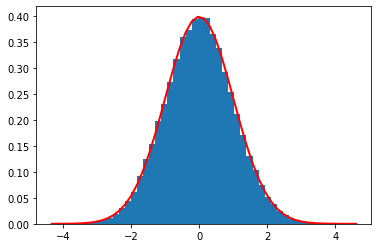

In [43]:
count, bins, ignored = plt.hist(p_data,50,density=True)
plt.plot(bins, 1/(p_sigma * np.sqrt(2 * np.pi))*np.exp( - (bins)**2 / (2 * p_sigma**2) ),linewidth=2, color='r')

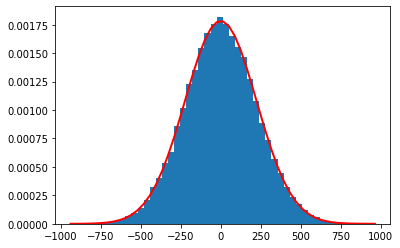

In [44]:
count, bins, ignored = plt.hist(f_data.real,50,density=True)
plt.plot(bins, 1/(f_sigma * np.sqrt(2 * np.pi))*np.exp( - (bins)**2 / (2 * f_sigma**2) ),linewidth=2, color='r')

Real space from fourier space

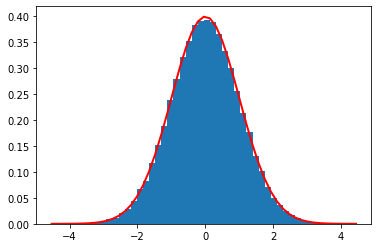

In [82]:
L = 10
N = 100000
dx = L/N
x = np.linspace(0,L,N)

f_mu = 0.
f_sigma = np.sqrt(N/2.)
f_data_real = np.random.normal(f_mu, f_sigma, np.int(N/2)+1)
f_data_imag = np.random.normal(f_mu, f_sigma, np.int(N/2)+1)

p_data = np.fft.irfft(f_data_real + 1j*f_data_imag)

count, bins, ignored = plt.hist(p_data,50,density=True)
plt.plot(bins, 1/(p_sigma * np.sqrt(2 * np.pi))*np.exp( - (bins)**2 / (2 * p_sigma**2) ),linewidth=2, color='r')

Band powers

In [0]:
nbands = 100
power=f_data.real**2 + f_data.imag**2
bin_means, bin_edges, binnumber=scipy.stats.binned_statistic(k,power,'mean',nbands)

(50000.0, 200000.0)

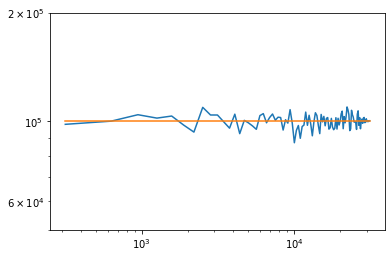

In [85]:
plt.loglog(bin_edges[1:],bin_means)
plt.loglog(bin_edges[1:],(2.*f_sigma**2)*np.ones(bin_means.shape))
plt.ylim(5e4,2e5)

Filtering

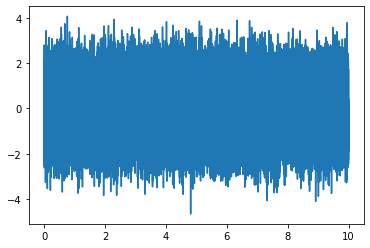

In [133]:
L = 10
N = 100000
R = .000000001
dx = L/N
x = np.linspace(0,L,N)

f_mu = 0.
f_sigma = np.sqrt(N/2.)
f_data_real = np.random.normal(f_mu, f_sigma, np.int(N/2)+1)
f_data_imag = np.random.normal(f_mu, f_sigma, np.int(N/2)+1)
k = 2.*np.pi*np.linspace(0,0.5*N/L,np.int(N/2)+1)
W = np.exp(-0.5*(k*R)**2)
f_data = W*(f_data_real + 1j*f_data_imag)
p_data = np.fft.irfft(f_data)

plt.plot(x,p_data)

In [134]:
print(np.var(p_data))
scipy.integrate.simps(W*W*f_sigma*f_sigma,k)

0.9976136688833978


1570796326.2781253

(2000.0000000000002, 300000.00000000006)

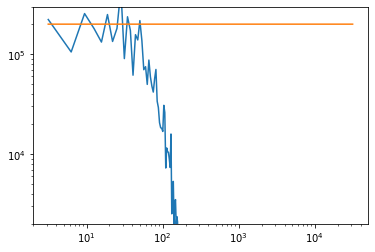

In [119]:
nbands = 10000
power = (W**2)*(f_data.real**2 + f_data.imag**2)
bin_means, bin_edges, binnumber=scipy.stats.binned_statistic(k,power,'mean',nbands)
plt.loglog(bin_edges[1:],bin_means)
plt.loglog(bin_edges[1:],(2.*f_sigma**2)*np.ones(bin_means.shape))
plt.ylim(.01*(2.*f_sigma**2),1.5*(2.*f_sigma**2))

In [135]:
f_sigma

223.60679774997897